# 의사결정 나무(Decision Tree)
- 스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것
- 알고리즘 성능이 나쁘지 않다.
- 복잡한 data set을 시각화 할 수 있다.

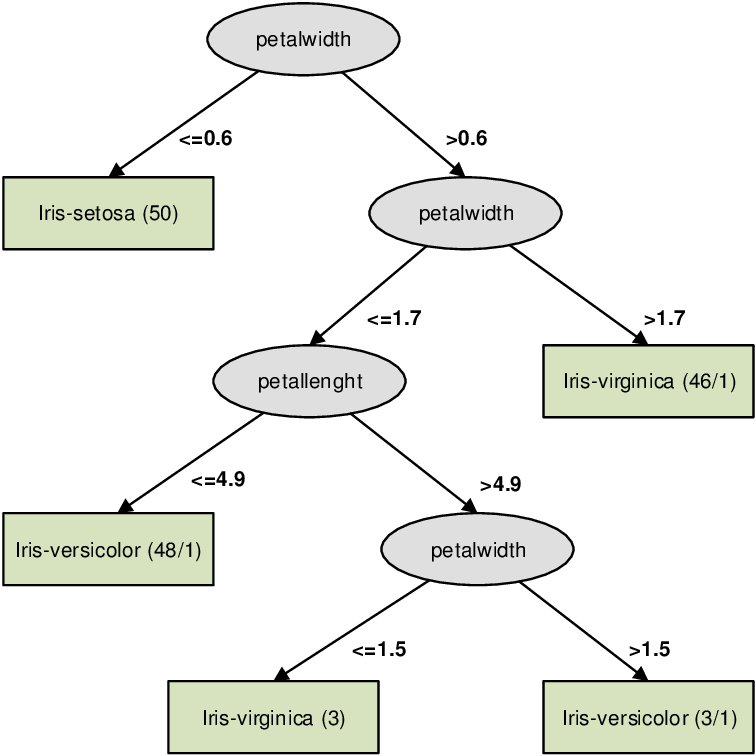

In [4]:
from IPython.display import Image
Image('./data/Decision-tree-for-Iris-dataset.png')

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris()

data = iris['data']
feature_names = iris['feature_names']

df_iris = pd.DataFrame(data, columns=feature_names)
df_iris['target'] = iris['target']

x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])
# stratify: label의 클래스의 분포를 균등하게 배분
# class imbalance 문제를 해결

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtc = DecisionTreeClassifier(random_state=0)

In [8]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
dtc_pred = dtc.predict(x_valid)

In [10]:
(dtc_pred == y_valid).mean()

0.9473684210526315

In [11]:
# 윈도우는 call dot을 못쓰기 때문에 pydotplus 설치
!pip install pydotplus

In [12]:
# 시각화 부분

from sklearn.tree import export_graphviz
import pydotplus
from subprocess import call 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


In [13]:
def graph_tree(model):
    # .dot 파일로 export 해줌
    export_graphviz(model, out_file='tree.dot')
    
    # 윈도우용, pydot 설치, graphviz 홈페이지에서 stable 윈도우버전 msi파일 설치 요망
    graph = pydotplus.graph_from_dot_file('tree.dot')
    graph.write_png('decision-tree.png')

    # 생성된 .dot 파일을 .png로 변환(이건 리눅스나 dot 환경변수 설정을 해주어야함)
    # call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])
    return Image(filename = 'decision-tree.png', width=500)

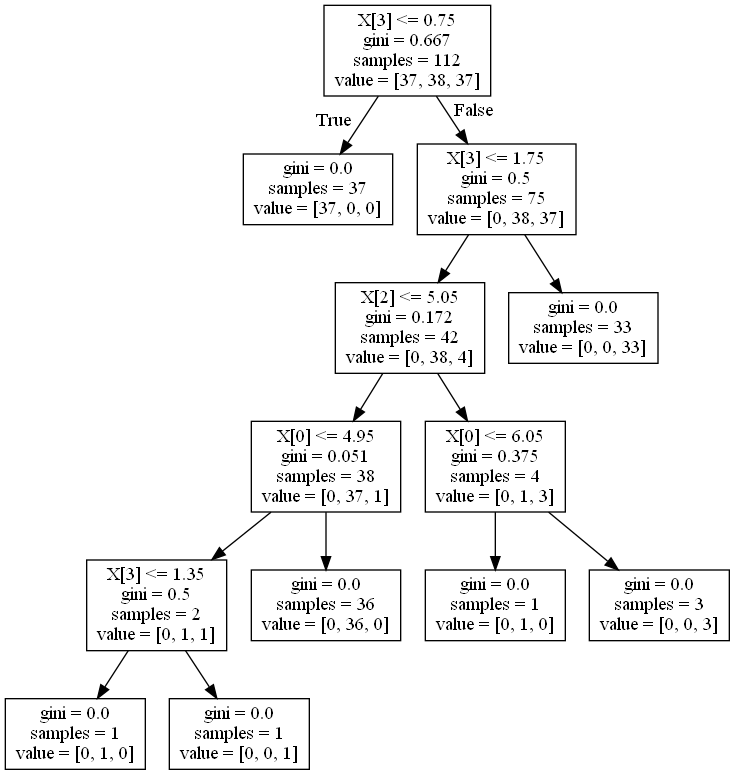

In [14]:
graph_tree(dtc)

# 이미지 보면 value에 분류된 클래스개수가 있음
# 맨 위가 분류기준 
# gini 계수 : 불순도를 의미하며, 계수가 높을수록 엔트로피가 크다는 의미, 엔트로피가 크다는 의미 = 클래스가 혼잡하게 섞여있다는 뜻
# 또한 decision tree에서 맥스 뎁스를 정할 수 있다.
# 가지치기 너무 많이하면 과적합(overfitting 될 수 있으므로 max depth를 정한다.)